In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
spotify = pd.read_csv('spotify.csv')
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
spotify

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


For this first approach we will select 200 random rows from the dataset

In [4]:
data = spotify.sample(n=200)
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
52310,52310,1LvhjfMeV6j8w2cHH9MRHp,George Jones,High-Tech Redneck,The Love In Your Eyes,15,233466,False,0.5070,0.3870,...,-11.812,1,0.0264,0.62300,0.000000,0.1430,0.2600,140.660,3,honky-tonk
81785,81785,4c8erEn1DjLoDp0CRLkNnq,Jasleen Royal;Harshdeep Kaur;Siddharth Mahadevan,Baar Baar Dekho (Original Motion Picture Sound...,Nachde Ne Saare,67,194761,False,0.8200,0.9070,...,-4.517,1,0.0607,0.65500,0.000048,0.0816,0.8340,126.062,4,pop
46220,46220,3Xzws8WS8lkolIxSalOycx,The Stunned Guys,SHE - Stunning Hardcore Elements,Io sono vivo,23,278213,True,0.4800,0.9970,...,-3.730,1,0.0773,0.09180,0.238000,0.6800,0.4590,182.010,4,happy
16240,16240,2XB7HlnIbMafSQuRRq7lm4,Johannes Brahms;Mischa Maisky;Pavel Gililov,Clásica para los niños de hoy,"Wiegenlied, Op. 49, No. 4",0,146773,False,0.0827,0.0134,...,-31.089,1,0.0520,0.99200,0.961000,0.0660,0.0606,81.694,5,classical
97487,97487,5FUjfsA4QAi24S1EC1y3Go,Bruno & Marrone,Bruno & Marrone Ao Vivo em Goiânia,Por um Gole a Mais - Ao Vivo,47,231360,False,0.4150,0.7390,...,-4.440,1,0.0472,0.68300,0.000001,0.9580,0.3220,73.119,4,sertanejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87882,87882,2iHwOGQ2HreSfcBsgYEYrf,Rita Coolidge,Best 70s Rock Tunes,We're All Alone,0,220520,False,0.3320,0.4290,...,-8.376,1,0.0287,0.35600,0.000031,0.0619,0.2420,128.091,4,r-n-b
88139,88139,2RhIaSWaloy5vprvJp5oAT,KAROL G,Perreo en Halloween,SEJODIOTO,2,181106,True,0.8220,0.7360,...,-3.969,1,0.1500,0.15700,0.000781,0.0748,0.6790,175.930,4,reggae
4463,4463,6jPob3XDIVyNwPKUv2GwBf,Sleeping At Last,You Are Enough (Acoustic),You Are Enough (Acoustic),43,188357,False,0.5020,0.3300,...,-8.568,1,0.0326,0.91300,0.000002,0.0717,0.2400,115.007,4,ambient
112283,112283,7HB1SEhUPXRndE7uOdEssq,No.1;Azap HG,Düş O Zaman,Düş O Zaman,43,293147,True,0.6220,0.6250,...,-7.936,0,0.0567,0.00338,0.000000,0.1630,0.2570,86.970,4,turkish


Now we will see some distributions regarding the song characteristics

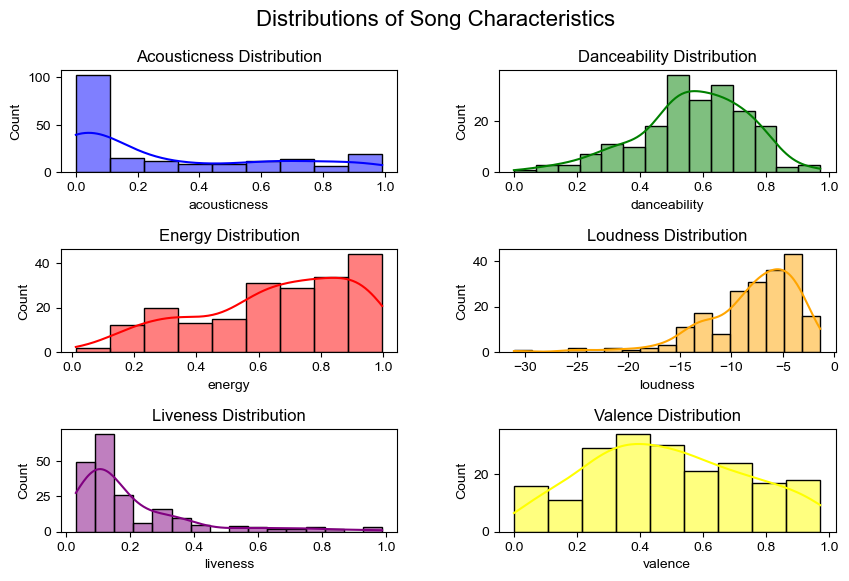

In [33]:
plt.rcParams['font.family'] = 'arial'  
plt.rcParams['font.size'] = 10          

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(10, 6))
fig.suptitle('Distributions of Song Characteristics', fontsize=16)


sns.histplot(data['acousticness'], kde=True, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Acousticness Distribution')
sns.histplot(data['danceability'], kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Danceability Distribution')
sns.histplot(data['energy'], kde=True, ax=ax[1, 0], color='red')
ax[1, 0].set_title('Energy Distribution')
sns.histplot(data['loudness'], kde=True, ax=ax[1, 1], color='orange')
ax[1, 1].set_title('Loudness Distribution')
sns.histplot(data['liveness'], kde=True, ax=ax[2, 0], color='purple')
ax[2, 0].set_title('Liveness Distribution')
sns.histplot(data['valence'], kde=True, ax=ax[2, 1], color='yellow')
ax[2, 1].set_title('Valence Distribution')
plt.subplots_adjust(hspace=0.75, wspace=0.3)
plt.savefig('song_characteristics.png', transparent=True, dpi = 300)
plt.show()


We will use the energy characteristic, since we can see that there is a different distribution.

In [6]:
energy=data['energy']
danceability=data['danceability']
loudness=data['loudness']

In [7]:
# get the min and max for the values of energy, danceability, and valence
min_energy = energy.min()
max_energy = energy.max()
min_danceability = danceability.min()
max_danceability = danceability.max()
min_loudness = loudness.min()
max_loudness = loudness.max()

print('Min and Max Energy:', min_energy, max_energy)
print('Min and Max Danceability:', min_danceability, max_danceability)
print('Min and Max Loudness:', min_loudness, max_loudness)


Min and Max Energy: 0.0134 0.997
Min and Max Danceability: 0.0 0.971
Min and Max Loudness: -31.089 -1.361


In [8]:
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

def scale_to_hsv(value, min_hsv, max_hsv):
    return min_hsv + (value * (max_hsv - min_hsv))

In [47]:
def assign_hsv_values(song,data):
    energy = data.loc[data['track_name'] == song, 'energy'].values[0]
    danceability = data.loc[data['track_name'] == song, 'danceability'].values[0]
    loudness = data.loc[data['track_name'] == song, 'loudness'].values[0]
    # Valores mínimos y máximos dados para HSV
    min_hue = 0
    max_hue = 360
    min_saturation = 0
    max_saturation = 100
    min_brightness = 0
    max_brightness = 100
    
    # Normalizar los valores
    normalized_energy = normalize(energy, min_energy, max_energy)
    normalized_danceability = normalize(danceability, min_danceability, max_danceability)
    normalized_valence = normalize(loudness, min_loudness, max_loudness)
    
    # Escalar los valores según las especificaciones
    scaled_hue = scale_to_hsv(normalized_valence, min_hue, max_hue)
    scaled_saturation = scale_to_hsv(normalized_danceability, min_saturation, max_saturation)
    scaled_brightness = scale_to_hsv(normalized_energy, min_brightness, max_brightness)
    
    # Devolver los valores asignados a cada canal HSV
    return scaled_hue, scaled_saturation, scaled_brightness

# Valores dados
energy = 0.767  
danceability = 0.672  
loudness = -4.455 
song = 'Bad Guy'
# Asignar los valores a los canales HSV
hue, saturation, brightness = assign_hsv_values(song, spotify)

# Mostrar los valores asignados
print("Matiz (Hue):", hue)
print("Saturación (Saturation):", saturation)
print("Brillo (Brightness):", brightness)


Matiz (Hue): 325.3902045209903
Saturación (Saturation): 57.98146240988671
Brillo (Brightness): 81.39487596583976


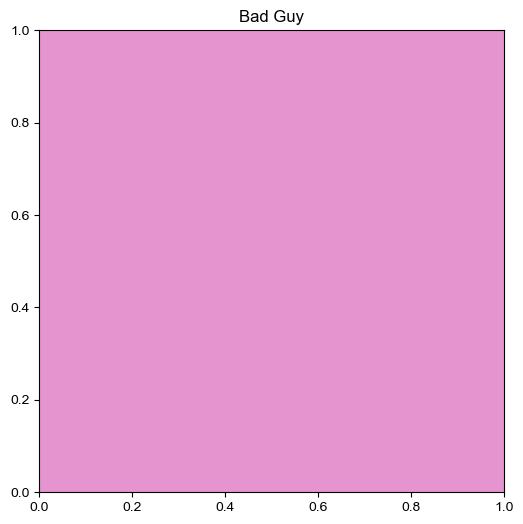

In [48]:
#plot the colour using the hsv values
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor((hue/360, saturation/100, brightness/100))
ax.set_title(song)
file_name = song + '.png'
plt.savefig(file_name, dpi = 300)
plt.show()

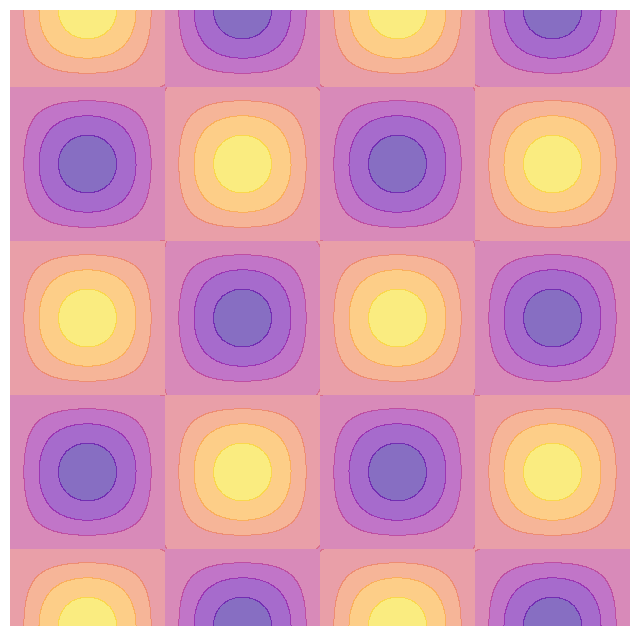

In [30]:
def generate_pattern(x, y, hue):
    # Generate a parametric pattern based on hue
    pattern_intensity = np.sin(x * 2 * np.pi) * np.cos(y * 2 * np.pi) * hue
    return pattern_intensity

hue = hue / 360  # Normalize hue to [0, 1]
saturation = saturation / 100  # Normalize saturation to [0, 1]
brightness = brightness / 100  # Normalize brightness to [0, 1]

# Generate x and y coordinates for the pattern
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Generate the pattern intensity
pattern_intensity = generate_pattern(X, Y, hue)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pattern
cmap = plt.cm.get_cmap('plasma')  # Choose a colormap for the pattern
pattern_plot = ax.contourf(X, Y, pattern_intensity, cmap=cmap, alpha=saturation)

# Set background color of the t-shirt
ax.set_facecolor((brightness, brightness, brightness))

# Remove axes
ax.axis('off')

# Show the plot
plt.show()
